# Gain and Lift chart example

* ### Classification process

Data Set: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data_set = pd.read_csv(".\Data Sets\PDS.csv")

data_set.head()

,Pregnencies,Plasma,Diastolic,Triceps,Serum,BMI,Pedigree,Age,Diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#shape of the data set

data_set.shape

(768, 9)

In [4]:
data_set.columns

Index(['Pregnencies', 'Plasma', 'Diastolic', 'Triceps', 'Serum', 'BMI',
       'Pedigree', 'Age', 'Diabete'],
      dtype='object')

In [5]:
data_set.dtypes

Pregnencies      int64
Plasma           int64
Diastolic        int64
Triceps          int64
Serum            int64
BMI            float64
Pedigree       float64
Age              int64
Diabete          int64
dtype: object

* Convert above data set into Features and response

In [6]:
#convert DataFrame into Matrix
mat_data = data_set.as_matrix()

#Feature Matrix
x = mat_data[:,0:8]

#Response Series/Vector
y = mat_data[:,8].astype('int')

In [7]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


* Split data into Train and test data set

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(537, 8) (231, 8) (537,) (231,)


In [9]:
#instantiate the model
logreg = LogisticRegression()

#fit the model train data
logreg.fit(xtrain,ytrain)

#The Co-efficient & Intercept
print(logreg.coef_,logreg.intercept_)

[[ 0.08142757  0.02615776 -0.01696135  0.00531404 -0.000753    0.05360851
   0.50768925  0.01373801]] [-5.43708967]


In [10]:
#Saving Co-efficient into dataframe
df_columns = data_set.columns[0:8]
coef_df = pd.DataFrame(logreg.coef_.flatten(),index = df_columns,columns=['Co-efficient Values'])

coef_df

,Co-efficient Values
Pregnencies,0.081428
Plasma,0.026158
Diastolic,-0.016961
Triceps,0.005314
Serum,-0.000753
BMI,0.053609
Pedigree,0.507689
Age,0.013738


In [11]:
#Predict on Feature test data
ypred = logreg.predict(xtest)

In [12]:
#print confusion matrics
cm = confusion_matrix(ytest,ypred)

print(cm)

[[142  15]
 [ 35  39]]


In [13]:
#print accuracy of the model
acc = accuracy_score(ytest,ypred)

#error rate 
err = 1.0 -acc

print("Accuracy of test:%f and error rate of test:%f"%(acc,err))

Accuracy of test:0.783550 and error rate of test:0.216450


In [14]:
#sensibility and specificity
def scores_sp_se(y,y_hat):
    scores_list = ['Sensitivity','Specificity']
    cm = confusion_matrix(y,y_hat)
    se = cm[1:,0] / cm[1:].sum()
    sp = cm[:1,0] / cm[:1].sum()
    scores = list(se) + list(sp)
    zipped = zip(scores_list,scores)    
    return(list(zipped))

#make a function usable as the scorer object
scorer = make_scorer(scores_sp_se) 
print(scorer(logreg,xtest,ytest))

[('Sensitivity', 0.47297297297297297), ('Specificity', 0.90445859872611467)]


*  ### Cross validation

In [15]:
# Cross validation on entire data set using cross_val_score

#instantiate the model
logreg = LogisticRegression()

#fit the model for entire data_set
logreg.fit(x,y)

#Saving Co-efficient into dataframe
df_columns = data_set.columns[0:8]
coef_df = pd.DataFrame(logreg.coef_.flatten(),index = df_columns,columns=['Co-efficient Values'])

coef_df

,Co-efficient Values
Pregnencies,0.117052
Plasma,0.028387
Diastolic,-0.016890
Triceps,0.000755
Serum,-0.000643
BMI,0.059760
Pedigree,0.677672
Age,0.007239


In [16]:
#Create Probability data

success = cross_val_score(logreg,x,y,cv=10,scoring='accuracy')

print(success.mean())

0.766968557758


* ### Scoring using Gain chart

In [17]:
#Instantiate the model

logreg = LogisticRegression()

#fit the model
logreg.fit(xtrain,ytrain)

#returns both negative and Positive probability
proba = logreg.predict_proba(xtest)
print("Negative Prob    Postive Prob\n",proba)

Negative Prob    Postive Prob
 [[ 0.10920054  0.89079946]
 [ 0.78985405  0.21014595]
 [ 0.85940384  0.14059616]
 [ 0.39127332  0.60872668]
 [ 0.82582806  0.17417194]
 [ 0.92366326  0.07633674]
 [ 0.32282934  0.67717066]
 [ 0.25660159  0.74339841]
 [ 0.59261485  0.40738515]
 [ 0.62419433  0.37580567]
 [ 0.45794595  0.54205405]
 [ 0.10428529  0.89571471]
 [ 0.69156969  0.30843031]
 [ 0.77680046  0.22319954]
 [ 0.83023966  0.16976034]
 [ 0.79518417  0.20481583]
 [ 0.19572227  0.80427773]
 [ 0.9304532   0.0695468 ]
 [ 0.59224198  0.40775802]
 [ 0.68606481  0.31393519]
 [ 0.42848123  0.57151877]
 [ 0.64666115  0.35333885]
 [ 0.64361903  0.35638097]
 [ 0.90376459  0.09623541]
 [ 0.89755231  0.10244769]
 [ 0.6203647   0.3796353 ]
 [ 0.91316821  0.08683179]
 [ 0.17791729  0.82208271]
 [ 0.82073279  0.17926721]
 [ 0.79441775  0.20558225]
 [ 0.5263097   0.4736903 ]
 [ 0.72151618  0.27848382]
 [ 0.87235022  0.12764978]
 [ 0.52893788  0.47106212]
 [ 0.81729252  0.18270748]
 [ 0.33748063  0.6625193

In [18]:
#we are interested in Positive probability(i.e. Response)
TP_prob = proba[:,1]

#transforming 0/1 the ytest vector
pos = pd.get_dummies(ytest).as_matrix()[:,1]

#indices that would sort according to the posive probability
index = np.argsort(TP_prob)[::-1]

#sorted positions
sort_pos = pos[index]
#no of instance in the ytest
n = ytest.shape[0]

#Base Rate
Base_rate = np.arange(1,n+1)

#Base_rate percentage
Base_rate= Base_rate/n

In [19]:
#create a dataframe that stores all the probability and true positive
df = pd.DataFrame(TP_prob[index],columns=['TP'])
decile_df=pd.DataFrame()
df['sorted'] = np.array(sort_pos)
df['decile'] = (df['TP'].argsort()/float(len(df))*10).astype('int')
df['Base_rate'] = Base_rate

In [20]:
#create a decile Data frame for the entire data set
index = df.groupby(df.decile).mean().index

#Decile for Base rate this would be helpful is the worst model 
base = (df.Base_rate.groupby(df.decile).mean()*100)[::-1].reset_index()

#count number of values group by both sorted response and decile
decile_values = df.groupby([df.decile,df.sorted]).count()

#data with actual True positive for each decile
decile_df['Good'] = decile_values['TP'][:,0]

#data with actual true negative for each decile
decile_df['Bad'] = decile_values['TP'][:,1]

#clear Nan 
decile_df = decile_df.fillna(0)

#calculate Sensitivity(recall) and specificty
decile_df['Recall'] = decile_df.Good/sum(decile_df.Good)*100
decile_df['Specificty'] = decile_df.Bad/sum(decile_df.Bad)*100

#Cummulative values of True positive rate(recall) and True Negative rate
decile_df['Cum_Good'] = np.cumsum(decile_df.Recall)
decile_df['Cum_Bad'] = np.cumsum(decile_df.Specificty)
decile_df['Population'] = (decile_df.Good+decile_df.Bad)/n*100
decile_df['Lift'] = decile_df.Recall/base.Base_rate
decile_df['Cum_lift'] = np.cumsum(decile_df.Lift)
decile_df['Without_Model'] = sum(decile_df.Good)/n
decile_df['Without_Model'] = np.cumsum(decile_df.Without_Model)
decile_df

,Good,Bad,Recall,Specificty,Cum_Good,Cum_Bad,Population,Lift,Cum_lift,Without_Model
decile,,,,,,,,,,
0,24,0.0,15.286624,0.000000,15.286624,0.000000,10.38961,2.942675,2.942675,0.679654
1,22,1.0,14.012739,1.351351,29.299363,1.351351,9.95671,0.924841,3.867516,1.359307
2,21,2.0,13.375796,2.702703,42.675159,4.054054,9.95671,0.532726,4.400242,2.038961
3,21,2.0,13.375796,2.702703,56.050955,6.756757,9.95671,0.381458,4.781699,2.718615
4,15,8.0,9.554140,10.810811,65.605096,17.567568,9.95671,0.212212,4.993912,3.398268
5,16,7.0,10.191083,9.459459,75.796178,27.027027,9.95671,0.185365,5.179277,4.077922
6,13,10.0,8.280255,13.513514,84.076433,40.540541,9.95671,0.127516,5.306793,4.757576
7,14,9.0,8.917197,12.162162,92.993631,52.702703,9.95671,0.119068,5.425861,5.437229
8,7,16.0,4.458599,21.621622,97.452229,74.324324,9.95671,0.052548,5.478408,6.116883


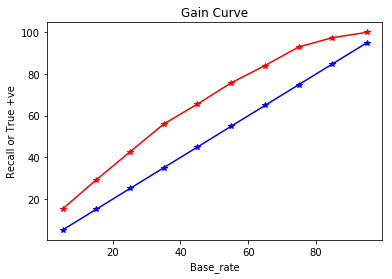

In [21]:
# Gain curve plot

plt.title("Gain Curve")
plt.xlabel("Base_rate")
plt.ylabel("Recall or True +ve")


#tricks to represent the diagonal
plt.plot(base.Base_rate,base.Base_rate,'b-*')

#gains curve
plt.plot(base.Base_rate,decile_df.Cum_Good,'r-*')

#show the chart
plt.show()

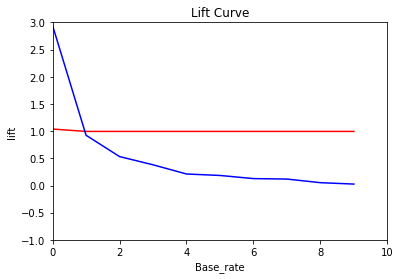

In [22]:
# Lift plot

plt.title("Lift Curve")
plt.xlabel("Base_rate")
plt.ylabel("lift")

plt.xlim(0,10)
plt.ylim(-1,3)
#plt.scatter()
plt.plot(decile_df.Population/10,'r-')

plt.plot(decile_df.Lift,'b-')
plt.show()


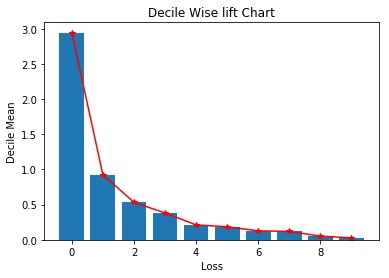

In [27]:
#Decile Chart plot

plt.title("Decile Wise lift Chart")
plt.xlabel("Loss")
plt.ylabel("Decile Mean")

plt.bar(index,decile_df.Lift)
plt.plot(decile_df.Lift,'r-*')
plt.show()

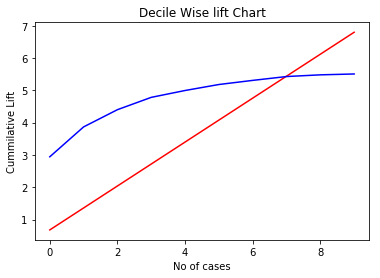

In [25]:
#Cummilative Chart plot

plt.title("Decile Wise lift Chart")
plt.xlabel("No of cases")
plt.ylabel("Cummilative Lift")

plt.plot(decile_df.Without_Model,'r-')
plt.plot(decile_df.Cum_lift,'b-')
plt.show()

* Above lift shows that Model used doesn't give you a good lift after 4th decile the lift becomes negative

**Reference 1:** https://eric.univ-lyon2.fr/~ricco/cours/slides/PJ%20-%20en%20-%20machine%20learning%20avec%20scikit-learn.pdf

**Reference 2(Gant Chart):** https://www.youtube.com/watch?v=uwrjI0TT6xc

**Reference 3(Decile):** http://thread.gmane.org/gmane.comp.python.pystatsmodels/6742
 
For more accurate documentation regaring funtions used in this code please refer to Sklearn Documentation